YCbCr (Luma / Chroma) Assignment:

- Choose a new different image  
- Convert into YCbCr color space (cb quanto ciascun pixel è vicino al blu piuttosco che al suo opposto giallo) (cr per ciascun pixel è vicino al rosso piuttosto che al suo opponente verde)  
- Blur Cb and Cr channels using a wide gaussian filter (sfocare le componenti dei canali colore utilizzando un filtro gaussiano)  
- Visualize each channel of the YCbCr, and the rebuilt resulting RGB image (visualizzare l'immagine composta RGB ricomposta e anche YCbCr decomposto)  
- Blur only the Y channel (and keep the original Cb and Cr) (sfocare solo Y mantenendo Bc e Cr ad alta risoluzione)  
- Visualize each channel of the YCbCr, and the rebuilt resulting RGB image (visualizzare YCbCr decomposta, RGB ricomposta)  

You can test with different sizes of the gaussian filter to appreciate the degree of tolerance of the human eye to color compression.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

import cv2


## Image loading and visualization

In [2]:
im = io.imread('Il_figlio_delluomo_Magritte.png', as_gray=False)

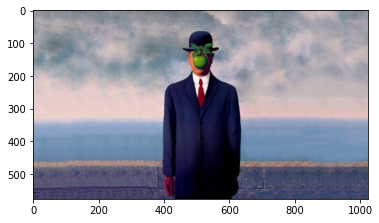

In [3]:
plt.imshow(im, cmap='gray'); plt.show()

In [4]:
shape = im.shape
print(shape)

(576, 1024, 3)


# Convert into YCbCr
In electronics, the term YCbCr or Y'CbCr denotes a family of color spaces used in component video and digital photography systems. Y is the luma component, Y' is the luminance component (obtained from the luma by gamma correction) while Cb and Cr indicate the chrominance components (i.e. the difference from gray in the blue and red range, respectively).
- LUMINANCE, also referred to as the Y component, is the signal that carries information about black and white television images; low luminance corresponds to a dark dot on the screen, high luminance implies a bright dot.
- CHROMINANCE is a property of the spectrum of a television signal which, when combined with luminance, allows reconstruction of color images. Its practical application is often in systems that can use both black-and-white and color terminals, so typically television.

In [5]:
im = io.imread('Il_figlio_delluomo_Magritte.png')

In [6]:
# Convert in YCbCr
im_YCbCr = color.rgb2ycbcr(im)

In [7]:
im.max()

255

<Figure size 432x288 with 0 Axes>

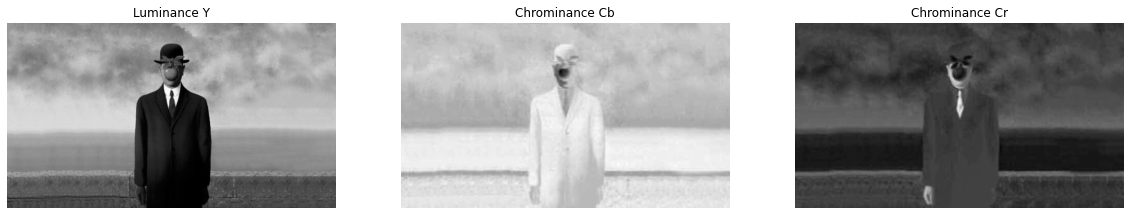

In [8]:
# Independent visualization of Y,Cb,Cr channels
plt.figure()
plt.figure(figsize = (20,20))
plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,0], cmap='gray'); plt.title('Luminance Y'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(im_YCbCr[:,:,1], cmap='gray'); plt.title('Chrominance Cb'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(im_YCbCr[:,:,2], cmap='gray'); plt.title('Chrominance Cr'); plt.axis('off')
plt.show()

# Gaussian filter


The first two parameters to skimage.filters.gaussian() are the image to blur, image, and a tuple defining the sigma to use in y- and x-direction, (sigma, sigma). The third parameter truncate gives the radius of the kernel in terms of sigmas. A Gaussian is defined from -infinity to +infinity. A discrete Gaussian can only approximate the real function. The truncate parameter steers at what distance to the center of the function it is not approximated any more. In the above example we set truncate to 3.5. With a sigma of 1.0 the resulting kernel size would be 7. The default value for truncate in sklearn is 4.0. The last parameter is to tell skimage how to interpret our image, that has three dimensions, as a multichannel color image. After the blur filter has been executed, the program wraps things up by displaying the blurred image in a new window.

https://datacarpentry.org/image-processing/06-blurring/


#Blur Cb
Blue channel blurring

In [9]:
gf_Cb = filters.gaussian(im_YCbCr[:,:,1], sigma=5)

<Figure size 432x288 with 0 Axes>

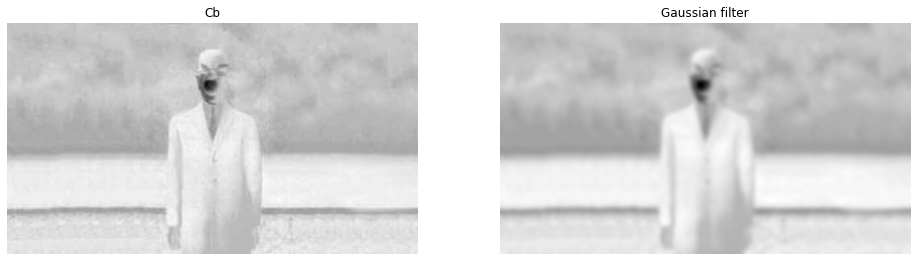

In [10]:
plt.figure()
plt.figure(figsize = (25,25))

plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,1],cmap="gray"); plt.title('Cb'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gf_Cb,cmap="gray"); plt.title("Gaussian filter"); plt.axis('off')


plt.show()

# Blur Cr
Red channel blurring

In [11]:
gf_Cr = filters.gaussian(im_YCbCr[:,:,2], sigma=5)

<Figure size 432x288 with 0 Axes>

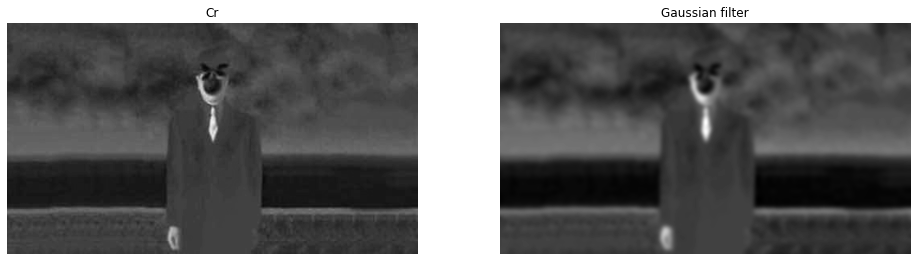

In [12]:
plt.figure()
plt.figure(figsize = (25,25))

plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,2],cmap="gray"); plt.title('Cr'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gf_Cr,cmap="gray"); plt.title("Gaussian filter"); plt.axis('off')


plt.show()

# Visualize each channel of the YCbCr, and the rebuilt resulting RGB image


In [13]:
# Conversion from YCbCr to RGB
im_rgb = color.ycbcr2rgb(np.dstack((im_YCbCr[:,:,0], gf_Cb, gf_Cr)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


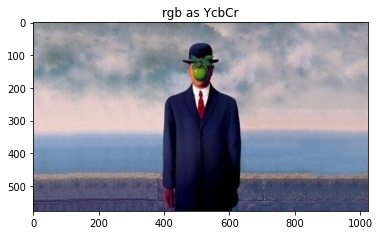

In [14]:
plt.imshow(im_rgb); plt.title('rgb as YcbCr'); plt.show()

# Blur only the Y channel
Y channel blurring

In [25]:
gf_Y = filters.gaussian(im_YCbCr[:,:,0], sigma=5)
gf_Y_sigma_20 = filters.gaussian(im_YCbCr[:,:,0], sigma=20)

<Figure size 432x288 with 0 Axes>

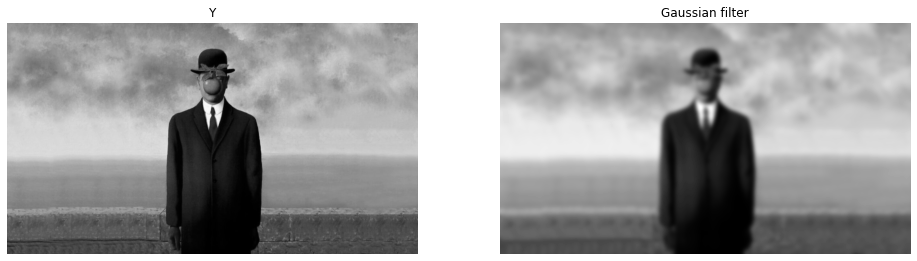

In [20]:
plt.figure()
plt.figure(figsize = (25,25))

plt.subplot(1,3,1); plt.imshow(im_YCbCr[:,:,0],cmap="gray"); plt.title('Y'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gf_Y,cmap="gray"); plt.title("Gaussian filter"); plt.axis('off')


plt.show()

# Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

In [38]:
# Conversion from YCbCr to RGB
im_rgb_2 = color.ycbcr2rgb(np.dstack((gf_Y, im_YCbCr[:,:,1], im_YCbCr[:,:,2])))
im_rgb_3 = color.ycbcr2rgb(np.dstack((gf_Y_sigma_20, im_YCbCr[:,:,1], im_YCbCr[:,:,2])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

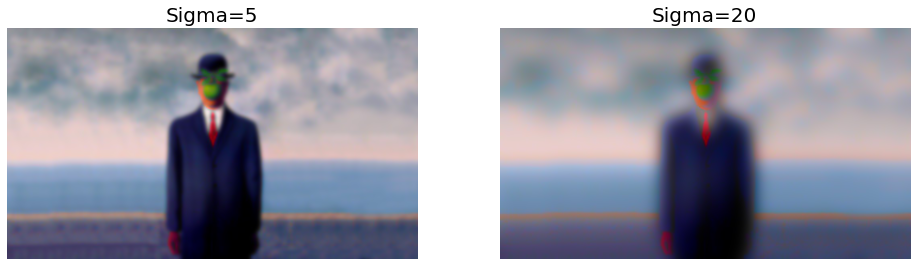

In [44]:
plt.figure()
plt.figure(figsize = (25,25))

plt.subplot(1,3,1); plt.imshow(im_rgb_2); plt.title("Sigma=5", fontsize=20); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(im_rgb_3); plt.title("Sigma=20", fontsize=20); plt.axis('off')


plt.show()

The higher the sigma parameter, the more blurred the image will be.
You can see the difference when using sigma=5 and sigma=20 in the pictures above.